In [1]:
from sentiment_anaylsis_twitter_data import *

In [2]:
from textblob import TextBlob

In [ ]:
twitter_client = TwitterClient()
tweet_analyzer = TweetAnalyzer()

api = twitter_client.get_twitter_client_api()

tweets = api.user_timeline(screen_name="realDonaldTrump", count=50)

df = tweet_analyzer.tweets_to_data_frame(tweets)
df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])

print(df.head(5))

# Clean text

In [ ]:
df['tweets'].head(10) # same as blob.head(n)

### Change all to lower case

In [5]:
df['tweets'] = [text.lower() for text in df['tweets'] ] # can also use upper()

df['tweets'].head(10)

0    michael cohen’s book manuscript shows that he ...
1    ...and the fraudulent and dishonest statements...
2    oh’ i see! now that the 2 year russian collusi...
3    congress must demand the transcript of michael...
4    wow, just revealed that michael cohen wrote a ...
5    great to be back from vietnam, an amazing plac...
6    today in alaska, it was my great honor to visi...
7                              https://t.co/ywnk8ehoh0
8                              https://t.co/huk9dsbm3m
9    i will be interviewed by @seanhannity at 9:00 ...
Name: tweets, dtype: object

### Remove links and @

In [6]:
url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
# remove link
#df['tweets'] = [re.sub(url_pattern, ' ', text) for text in df['tweets']]

at_pattern = r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)'

df['tweets'] = [re.sub(at_pattern or url_pattern, ' ', text) for text in df['tweets']]
df['tweets'].head(10)

0    michael cohen s book manuscript shows that he ...
1       and the fraudulent and dishonest statements...
2    oh  i see  now that the 2 year russian collusi...
3    congress must demand the transcript of michael...
4    wow  just revealed that michael cohen wrote a ...
5    great to be back from vietnam  an amazing plac...
6    today in alaska  it was my great honor to visi...
7                                                     
8                                                     
9    i will be interviewed by   at 9 00 p m  on    ...
Name: tweets, dtype: object

### Removing Punctuations, Numbers, and Special Characters

In [7]:
df['tweets'] = df['tweets'].str.replace("[^a-zA-Z#]", " ")
df['tweets'].head(10)

0    michael cohen s book manuscript shows that he ...
1       and the fraudulent and dishonest statements...
2    oh  i see  now that the   year russian collusi...
3    congress must demand the transcript of michael...
4    wow  just revealed that michael cohen wrote a ...
5    great to be back from vietnam  an amazing plac...
6    today in alaska  it was my great honor to visi...
7                                                     
8                                                     
9    i will be interviewed by   at      p m  on    ...
Name: tweets, dtype: object

### Removing Short Words

In [8]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1])) # 
# this only work after tokenization using blob, otherwise, text will refers to the whole sentence
df['tweets'].head(10)

0    michael cohen book manuscript shows that he co...
1    and the fraudulent and dishonest statements he...
2    oh see now that the year russian collusion cas...
3    congress must demand the transcript of michael...
4    wow just revealed that michael cohen wrote lov...
5    great to be back from vietnam an amazing place...
6    today in alaska it was my great honor to visit...
7                                                     
8                                                     
9                   will be interviewed by at on enjoy
Name: tweets, dtype: object

# Sentimental analysis using the clean text

In [9]:
def clean_tweet(df):
    df = [text.lower() for text in df] # can also use upper()    
    url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
    at_pattern = r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)'    
    df= [re.sub(at_pattern or url_pattern, ' ', text) for text in df]
    
    return (df)    

In [10]:
tweets = api.user_timeline(screen_name="realDonaldTrump", count=100)
df = tweet_analyzer.tweets_to_data_frame(tweets)
df['clean_tweet'] = clean_tweet(df['tweets'])
df['clean_tweet']= df['clean_tweet'].str.replace(r"[^a-zA-Z#]", " ") 
df['clean_tweet']= df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
print(df.head(5))

                                              tweets                   id  \
0  Michael Cohen’s book manuscript shows that he ...  1101476470034259968   
1  ...and the fraudulent and dishonest statements...  1101473899357880321   
2  Oh’ I see! Now that the 2 year Russian Collusi...  1101472084730003457   
3  Congress must demand the transcript of Michael...  1101469141213630464   
4  Wow, just revealed that Michael Cohen wrote a ...  1101467190824439808   

   len                date              source  likes  retweets  \
0  139 2019-03-01 13:37:09  Twitter for iPhone  33801      8755   
1  140 2019-03-01 13:26:56  Twitter for iPhone  41643     10570   
2  140 2019-03-01 13:19:44  Twitter for iPhone  42624     10870   
3  140 2019-03-01 13:08:02  Twitter for iPhone  34450      9140   
4  140 2019-03-01 13:00:17  Twitter for iPhone  35411      9172   

                                         clean_tweet  
0  michael cohen book manuscript shows that commi...  
1  and the fraudulent an

### Check if the sentiment change after cleaning the text more

In [11]:
df['ori_sen'] = [TextBlob(text).sentiment.polarity for text in df['tweets']]
df['new_sen'] = [TextBlob(text).sentiment.polarity for text in df['clean_tweet']]

In [12]:
import seaborn as sns

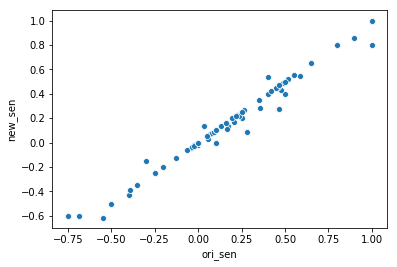

In [13]:
sns.scatterplot(df['ori_sen'],df['new_sen'])

In [14]:
df[df['new_sen']> 0.6][df['ori_sen']< 0]

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweets,id,len,date,source,likes,retweets,clean_tweet,ori_sen,new_sen


In [15]:
df

,tweets,id,len,date,source,likes,retweets,clean_tweet,ori_sen,new_sen
0,Michael Cohen’s book manuscript shows that he ...,1101476470034259968,139,2019-03-01 13:37:09,Twitter for iPhone,33801,8755,michael cohen book manuscript shows that commi...,0.000000,0.000000
1,...and the fraudulent and dishonest statements...,1101473899357880321,140,2019-03-01 13:26:56,Twitter for iPhone,41643,10570,and the fraudulent and dishonest statements ma...,-0.400000,-0.433333
2,Oh’ I see! Now that the 2 year Russian Collusi...,1101472084730003457,140,2019-03-01 13:19:44,Twitter for iPhone,42624,10870,see now that the year russian collusion case h...,0.000000,0.000000
3,Congress must demand the transcript of Michael...,1101469141213630464,140,2019-03-01 13:08:02,Twitter for iPhone,34450,9140,congress must demand the transcript michael co...,0.068182,0.068182
4,"Wow, just revealed that Michael Cohen wrote a ...",1101467190824439808,140,2019-03-01 13:00:17,Twitter for iPhone,35411,9172,wow just revealed that michael cohen wrote lov...,0.245455,0.245455
5,"Great to be back from Vietnam, an amazing plac...",1101464443114921984,140,2019-03-01 12:49:22,Twitter for iPhone,44157,9198,great back from vietnam amazing place had very...,0.400000,0.400000
6,"Today in Alaska, it was my great honor to visi...",1101340141501714432,140,2019-03-01 04:35:26,Twitter for iPhone,65206,13421,today alaska was great honor visit with our br...,0.500000,0.500000
7,https://t.co/ywNk8EhOh0,1101331345542918145,23,2019-03-01 04:00:29,Twitter for iPhone,36600,8167,,0.000000,0.000000
8,https://t.co/hUK9dSBM3M,1101331221655760897,23,2019-03-01 03:59:59,Twitter for iPhone,37258,8389,,0.000000,0.000000
9,I will be interviewed by @seanhannity at 9:00 ...,1101289772528603137,70,2019-03-01 01:15:17,Twitter for iPhone,50367,9568,will interviewed enjoy,0.500000,0.400000


####  After comparing the sentiment anlaysis results with the less clean and clean text, it shows that without removing the @ and http and short words it is actually more accurate 

Problem fixed after only remove words that is one single letter, maybe should just get rid of this funciton and remove stop words when doing key word extraction

# some functions in textblob

In [16]:
df['tweets'] = [TextBlob(text) for text in df['tweets']]

In [17]:
df['tweets'].head()

0    (M, i, c, h, a, e, l,  , C, o, h, e, n, ’, s, ...
1    (., ., ., a, n, d,  , t, h, e,  , f, r, a, u, ...
2    (O, h, ’,  , I,  , s, e, e, !,  , N, o, w,  , ...
3    (C, o, n, g, r, e, s, s,  , m, u, s, t,  , d, ...
4    (W, o, w, ,,  , j, u, s, t,  , r, e, v, e, a, ...
Name: tweets, dtype: object

In [18]:
df['tweets'].iloc[0].sentences

[Sentence("Michael Cohen’s book manuscript shows that he committed perjury on a scale not seen before."),
 Sentence("He must have forgotten… https://t.co/NlQQxe5zeL")]

In [19]:
df['tweets'].iloc[0].words

WordList(['Michael', 'Cohen', '’', 's', 'book', 'manuscript', 'shows', 'that', 'he', 'committed', 'perjury', 'on', 'a', 'scale', 'not', 'seen', 'before', 'He', 'must', 'have', 'forgotten…', 'https', 't.co/NlQQxe5zeL'])

In [20]:
for np in df['tweets'].iloc[0].noun_phrases:
    print (np)

michael cohen
’ s book manuscript shows
forgotten… https


# Extract key words and display it in wordcloud

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize 

In [22]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [23]:
from nltk.stem.porter import *
ps = PorterStemmer()

In [24]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

In [25]:
lmtzr.lemmatize('shows', 'v')

'show'

In [26]:
text = " ".join(tweet for tweet in df['clean_tweet'] if not tweet in stopwords)

In [33]:
# text = ps.stem(text)
# text = lmtzr.lemmatize(text,'v')

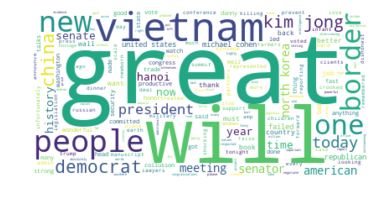

In [29]:
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
import cv2

In [31]:
mask = cv2.imread('mask.jpg')

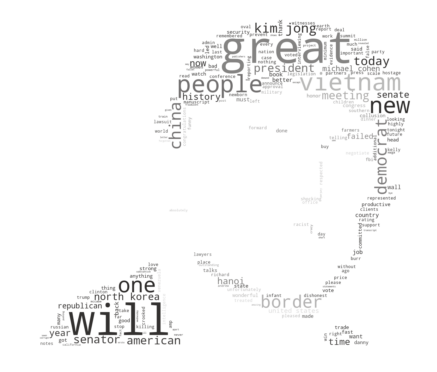

In [32]:
wordcloud = WordCloud(background_color="white", mask=mask,).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()